In [206]:
import matplotlib.pyplot as plt
import numpy as np
import analyzer
import Compare
import sys
import Plot_generator
plt.rcParams.update({'font.size': 14})
plt.rcParams['text.usetex'] = False

In [209]:
400*np.exp(-np.log(2)*2.44/0.205)

0.1044885791025357

In [214]:
400*np.exp(-np.log(2)*2.66/0.205)

0.04966063205291138

In [226]:
conf_start=10
conf_end=1000
conf_step=10
conf_4x32=np.arange(conf_start,conf_end,conf_step)

In [227]:
conf_start=120
conf_end=3000
conf_step=20
conf_8x64=np.arange(conf_start,conf_end,conf_step)

In [228]:
folder_gf="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf/"
conf=conf_4x32
#folder_gf="/ssd/ivsol/filtering/8x8x8x64_su2/gf/"
#conf=conf_8x64
file="Measure.seq"

q_gauge={}


top_gauge,conf_read=analyzer.Count_index_gf(folder_gf,conf)

for conf_i in conf_read:
    q_gauge[str(conf_i)]=[]

top_file=open(folder_gf+file,'r')
for line in top_file:
    sline=line.split(":")
    if len(sline)>6:
        if sline[3]=="TopologicalCharge" and sline[1] in conf_read and float(sline[5]) <= 2.25 :
            q_gauge[sline[1]].append(float(sline[7]))
top_file.close()

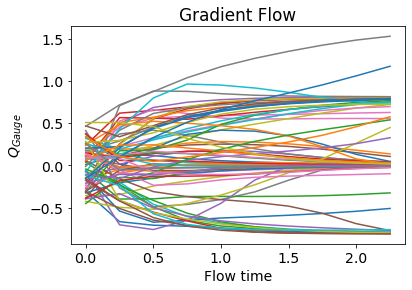

In [229]:
t=np.arange(0,2.50,0.25)
for key in q_gauge:
    plt.plot(t,q_gauge[key])
plt.ylabel(r'$Q_{Gauge}$')
plt.xlabel(r'Flow time')
plt.title(r'Gradient Flow')
plt.savefig(folder_gf+"Q_gf.pdf", dpi=150, bbox_inches='tight')
#plt.scatter(3.5,q_afm[key])

In [218]:
folder_mode="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/compare_1p5t_cut/gf_afm_2p0t/"
folder_mode="/ssd/ivsol/filtering/8x8x8x64_su2/compare_4p0t_cut/gf_afm_0p5t/"
q_afm={}
top_gauge,conf_read=analyzer.Count_index_gf(folder_gf,conf)
for conf_i in conf_read:
    mode=np.loadtxt(folder_mode+"susy_mode_"+str(conf_i)+"c_optimalcut.txt")
    q_afm[str(conf_i)]=mode.sum()
top_file.close()

for key in q_afm:
    plt.scatter(int(key),q_afm[key])
plt.ylabel(r'$Q_{AFM}$')
plt.xlabel(r'Configuration')
plt.title(r'gf afm 0p5t')
plt.savefig(folder_mode+"Q_afm_0p5t.pdf", dpi=150, bbox_inches='tight')

FileNotFoundError: /ssd/ivsol/filtering/8x8x8x64_su2/compare_4p0t_cut/gf_afm_0p5t/susy_mode_1020c_optimalcut.txt not found.